In [ ]:
import os
# os.environ['ROOK_URL'] = 'http://cp4cds-cn1.dkrz.de/wps'
os.environ['ROOK_URL'] = 'http://localhost:5000/wps'

In [2]:
from rooki import rooki
rooki.url

'http://localhost:5000/wps'

## subsetting

In [3]:
collection = 'CMIP6.CMIP.IPSL.IPSL-CM6A-LR.historical.r1i1p1f1.Amon.rlds.gr.v20180803'
time = '1880-01-01/1900-12-30'

In [4]:
resp = rooki.subset(collection, time=time)
resp.ok

True

In [5]:
resp.download_urls()

['http://localhost:5000/outputs/b53641ec-4153-11eb-a5e0-784f435e8862/rlds_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_18800116-19001216.nc']

### provenance for subsetting

In [6]:
prov_json_url = resp.provenance()
prov_json_url

'http://localhost:5000/outputs/af8971c4-4153-11eb-a5e0-784f435e8862/provenance.json'

In [7]:
import requests
requests.get(prov_json_url).json()

{'prefix': {'provone': 'http://purl.dataone.org/provone/2015/01/15/ontology#',
  'dcterms': 'http://purl.org/dc/terms/',
  'default': 'http://purl.org/roocs/prov#'},
 'agent': {'copernicus_CDS': {'prov:type': 'prov:Organization',
   'dcterms:title': 'Copernicus Climate Data Store'},
  'rook': {'prov:type': 'prov:SoftwareAgent',
   'dcterms:source': 'https://github.com/roocs/rook/releases/tag/v0.2.0'},
  'daops': {'prov:type': 'prov:SoftwareAgent',
   'dcterms:source': 'https://github.com/roocs/daops/releases/tag/v0.3.0'}},
 'wasAttributedTo': {'_:id1': {'prov:entity': 'rook',
   'prov:agent': 'copernicus_CDS'}},
 'activity': {'subset': {'time': '1880-01-01/1900-12-30',
   'apply_fixes': False}},
 'entity': {'CMIP6.CMIP.IPSL.IPSL-CM6A-LR.historical.r1i1p1f1.Amon.rlds.gr.v20180803': {},
  'rlds_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_18800116-19001216.nc': {}},
 'wasStartedBy': {'_:id2': {'prov:activity': 'subset',
   'prov:trigger': 'rook',
   'prov:starter': 'daops'}},
 'wasDerivedFro

In [8]:
prov_plot_url = resp.provenance_image()
prov_plot_url

'http://localhost:5000/outputs/af8971c4-4153-11eb-a5e0-784f435e8862/provenance.png'

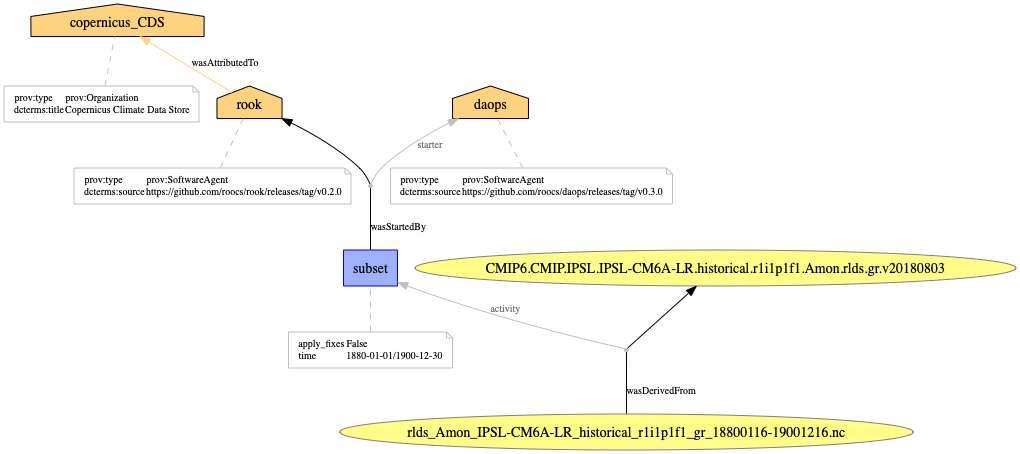

In [9]:
from IPython.display import Image
Image(prov_plot_url)

## workflow

In [10]:
from rooki import operators as ops

In [11]:
wf = ops.Subset(
    ops.Subset(
        ops.Input(
            'tas', ['CMIP6.CMIP.IPSL.IPSL-CM6A-LR.historical.r1i1p1f1.Amon.rlds.gr.v20180803']
        ),
        time="1860-01-01/1920-12-30",
    ),
    time="1880-01-01/1900-12-30"
)


In [12]:
resp = wf.orchestrate()
resp

Metalink URL: http://localhost:5000/outputs/b7047e94-4153-11eb-a5e0-784f435e8862/input.meta4, num files: 1

In [13]:
resp.download_urls()

['http://localhost:5000/outputs/be959d14-4153-11eb-a5e0-784f435e8862/rlds_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_18800116-19001216.nc']

### provenance

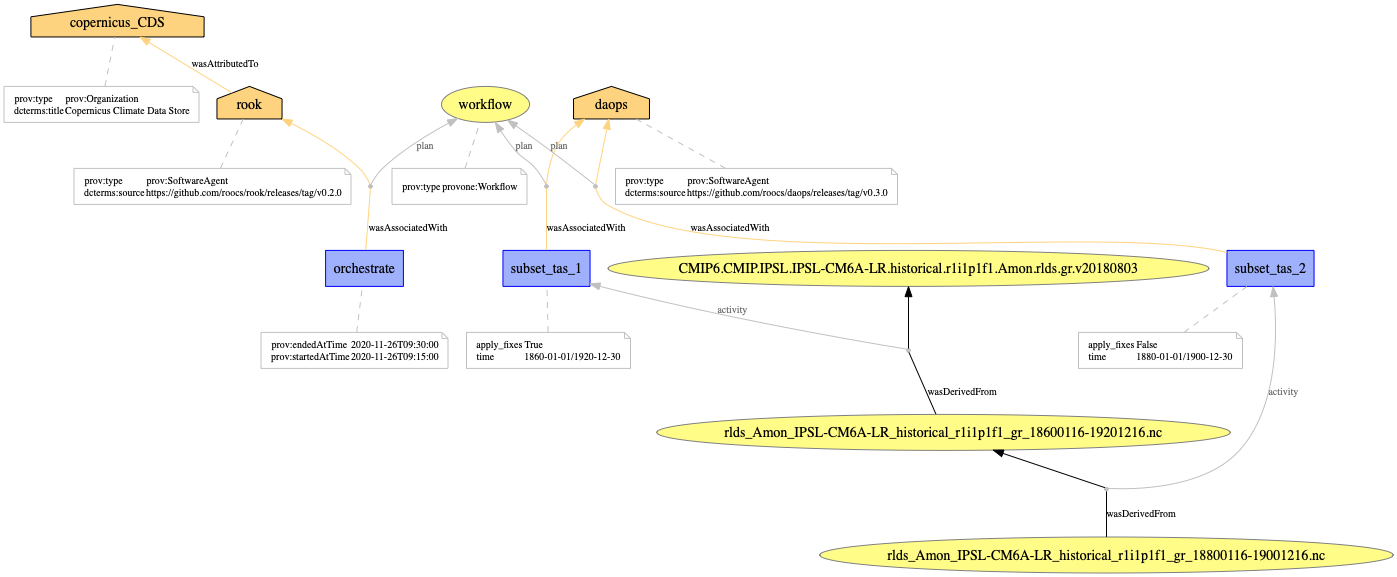

In [14]:
from IPython.display import Image
Image(resp.provenance_image())